In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [5]:
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


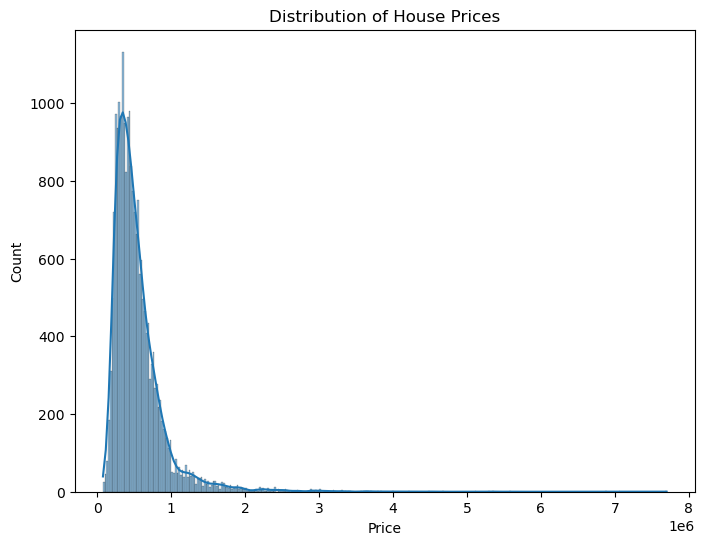

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


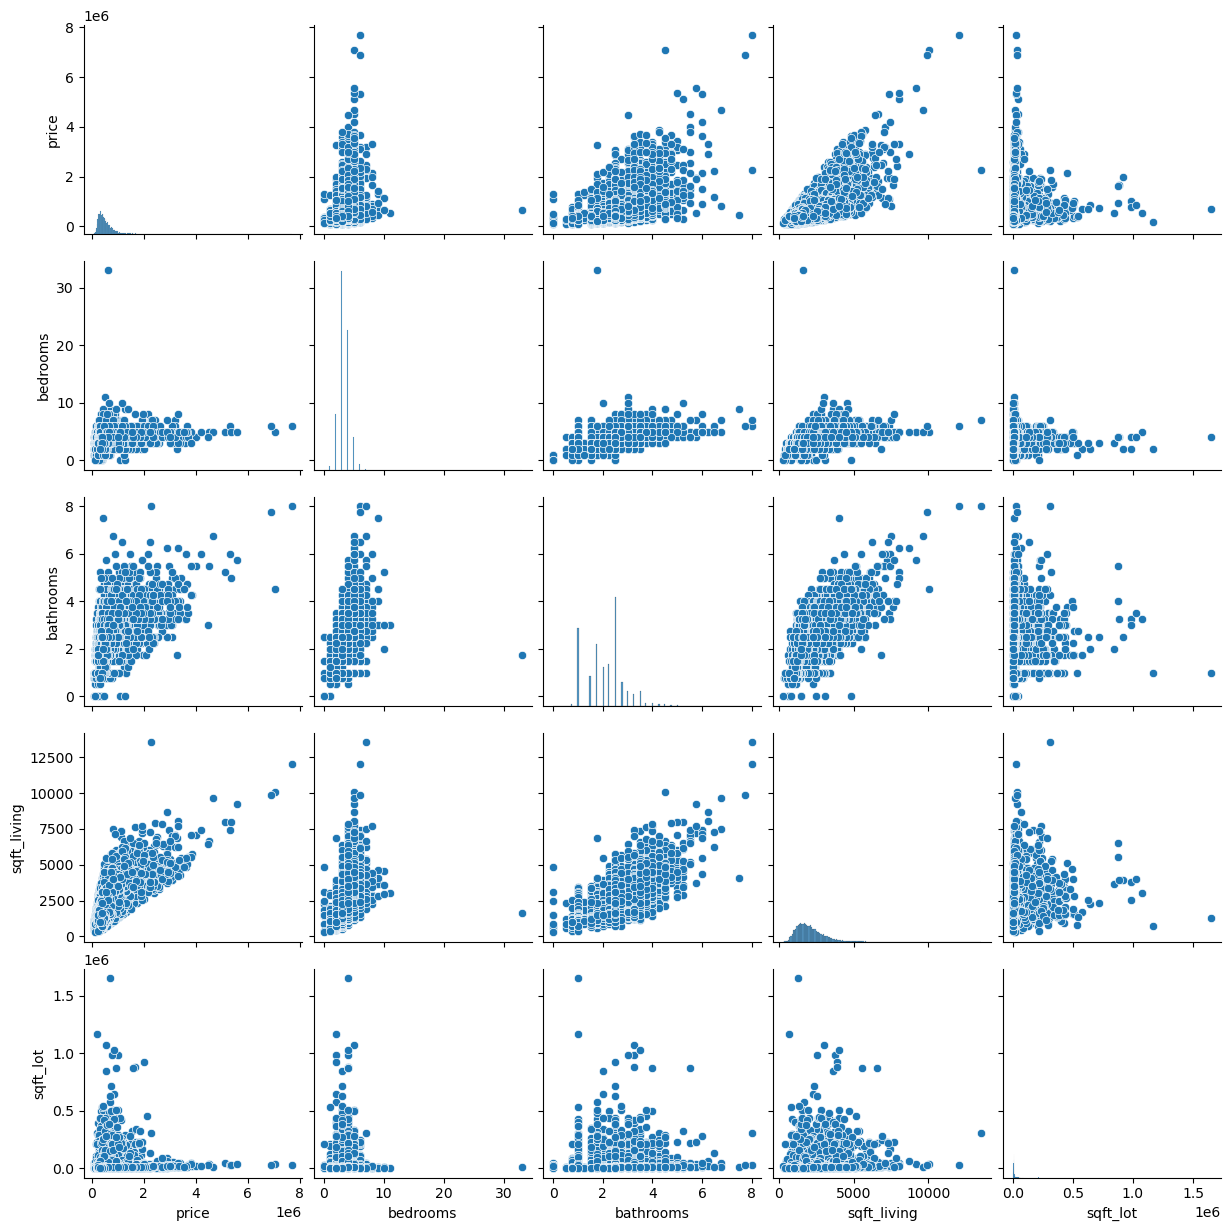

In [7]:
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
sns.pairplot(data[numerical_features])
plt.show()

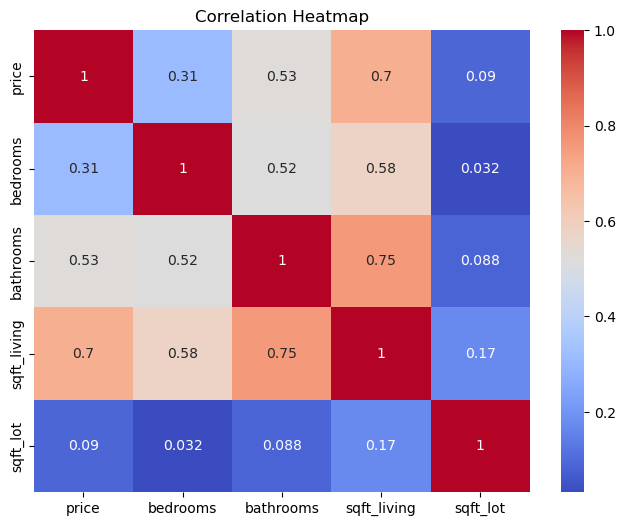

In [8]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

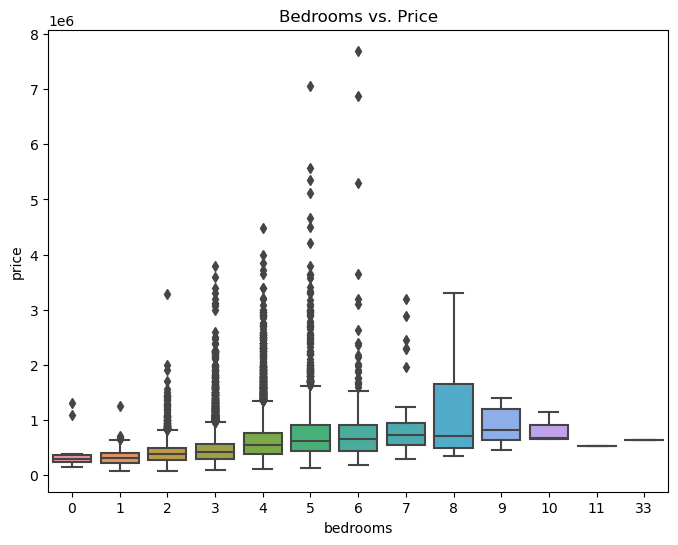

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title("Bedrooms vs. Price")
plt.show()

comment

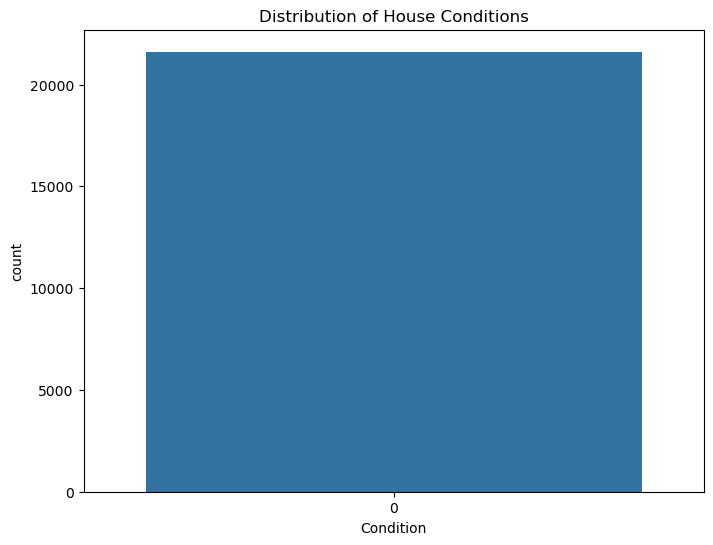

In [13]:
# Countplot to visualize the distribution of house conditions
plt.figure(figsize=(8, 6))
sns.countplot(data['condition'])
plt.title("Distribution of House Conditions")
plt.xlabel("Condition")
plt.show()

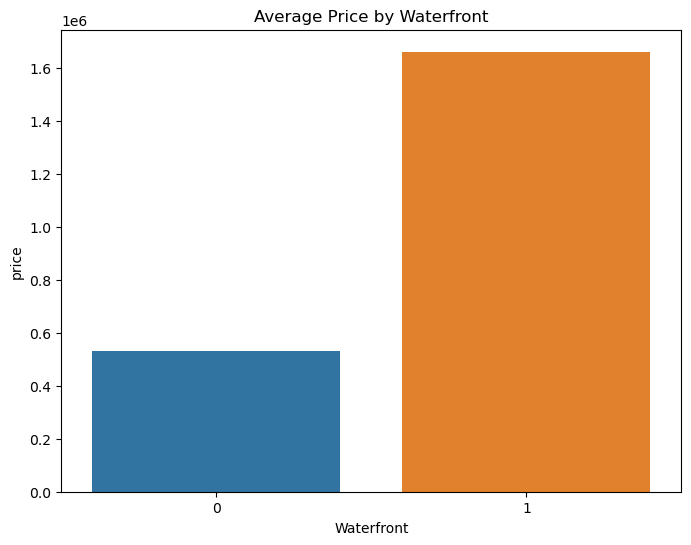

In [14]:
# Barplot to visualize the average price by waterfront status
average_price_by_waterfront = data.groupby('waterfront')['price'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='waterfront', y='price', data=average_price_by_waterfront)
plt.title("Average Price by Waterfront")
plt.xlabel("Waterfront")
plt.show()

Selecting the most important features is a critical aspect of building a predictive model for house prices using the "kc_house_data.csv" dataset. Among the numerous available features, some stand out as particularly influential. For instance, "sqft_living" (the living space's square footage), "bedrooms" (the number of bedrooms), and "bathrooms" (the number of bathrooms) are vital indicators of a house's size and functionality. "Grade," which reflects the overall quality of the property, and "view," representing the quality of the view from the house, also play pivotal roles. Additionally, "waterfront" status and "condition" are noteworthy, as they signal whether a property has a waterfront location and its overall state. A thoughtful feature selection process should blend domain expertise with data analysis techniques to identify these key factors that significantly contribute to the model's predictive power while maintaining simplicity and avoiding overfitting.

In [16]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data

# Define your feature columns (X) and target variable (y)
X = data.drop('price', axis=1)  # X contains all features except 'price'
y = data['price']  # y is the 'price' column

# Split the data into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The 'test_size' parameter controls the size of the testing set (30% in this case).
# 'random_state' ensures reproducibility by seeding the random number generator.

# You now have X_train, X_test, y_train, and y_test for model training and evaluation.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into X_train and y_train

# Create a linear regression model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the mean squared error on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Print the mean squared error
print("Mean Squared Error on Training Set: ", mse_train)

Mean Squared Error on Training Set:  39257059865.499374


C:\Users\hp\AppData\Local\Temp\ipykernel_13816\3201616537.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2, c='red', label='Perfect Fit')


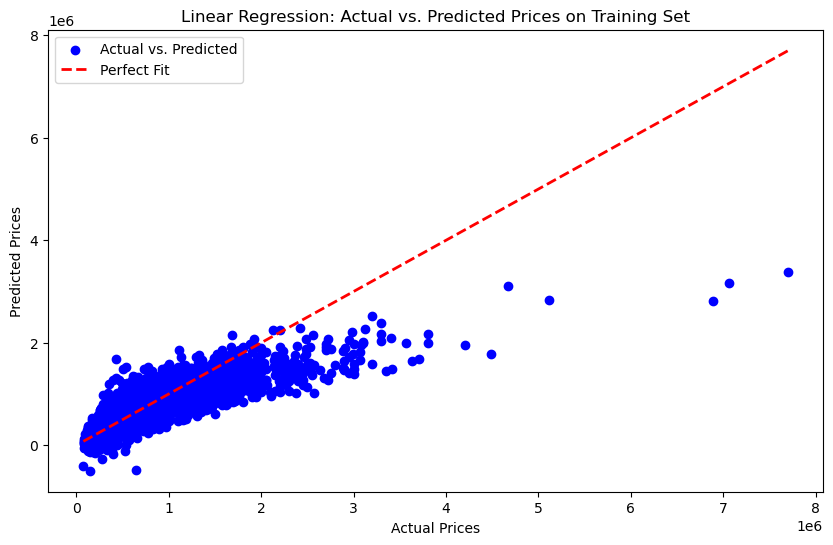

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2, c='red', label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices on Training Set')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already applied linear regression and have X_test and y_test

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate the R-squared (R²) score
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R²) Score: ", r2)

Mean Squared Error (MSE):  43387526779.35576
Root Mean Squared Error (RMSE):  208296.72772119046
Mean Absolute Error (MAE):  127486.8025571768
R-squared (R²) Score:  0.6994627057969851


In [21]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already split your data into X_train, X_test, y_train, and y_test

# Create and train a multiple linear regression model
multiple_lr_model = LinearRegression()
multiple_lr_model.fit(X_train, y_train)

# Make predictions on the testing set for the multiple linear regression model
y_test_pred_multiple_lr = multiple_lr_model.predict(X_test)

In [22]:
# Create and train a simple linear regression model
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train[['sqft_living']], y_train)  # Using only 'sqft_living' as a feature

# Make predictions on the testing set for the simple linear regression model
y_test_pred_simple_lr = simple_lr_model.predict(X_test[['sqft_living']])

In [23]:
# Calculate the Mean Squared Error (MSE) and R-squared (R²) for both models
mse_multiple_lr = mean_squared_error(y_test, y_test_pred_multiple_lr)
mse_simple_lr = mean_squared_error(y_test, y_test_pred_simple_lr)

r2_multiple_lr = r2_score(y_test, y_test_pred_multiple_lr)
r2_simple_lr = r2_score(y_test, y_test_pred_simple_lr)

# Print the evaluation metrics for both models
print("Multiple Linear Regression - MSE: ", mse_multiple_lr, " R²: ", r2_multiple_lr)
print("Simple Linear Regression (sqft_living only) - MSE: ", mse_simple_lr, " R²: ", r2_simple_lr)

Multiple Linear Regression - MSE:  43387526779.35576  R²:  0.6994627057969851
Simple Linear Regression (sqft_living only) - MSE:  74509993356.49603  R²:  0.48388319278201475


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can adjust the degree for higher-order polynomials
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Make predictions on the testing set for the polynomial regression model
y_test_pred_poly = polyreg.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) for the polynomial regression model
mse_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_poly = r2_score(y_test, y_test_pred_poly)

# Print the evaluation metrics for the polynomial regression model
print("Polynomial Regression (Degree %d) - MSE: %.2f, R²: %.2f" % (degree, mse_poly, r2_poly))

Polynomial Regression (Degree 2) - MSE: 28145466898.21, R²: 0.81


In [25]:
# Print the evaluation metrics for the linear regression model
print("Multiple Linear Regression - MSE: %.2f, R²: %.2f" % (mse_multiple_lr, r2_multiple_lr))

# Print the evaluation metrics for the simple linear regression model
print("Simple Linear Regression (sqft_living only) - MSE: %.2f, R²: %.2f" % (mse_simple_lr, r2_simple_lr))

Multiple Linear Regression - MSE: 43387526779.36, R²: 0.70
Simple Linear Regression (sqft_living only) - MSE: 74509993356.50, R²: 0.48
